# Assamese Classifier Processing Experiment
### Data was collected from 20 participants. 7 classifiers were used which are used for singular nouns. Each of the 20 participants were shown 45 pairs of word-classifier combinations. Some of these pairs were canonical (correct) and some of them were violations of the classifier (incorrect). Their response time and accuracy of response (whether correct or incorrect) were recorded for each of the 45 trials. Following is the data analysis and inferences of the experiment.

#### Importing necessary libraries

In [17]:
import pandas as pd
import glob
from scipy.stats import wilcoxon, pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np

#### Loading the data and Inspection

In [3]:
# Path to folder containing individual CSV files
path = "E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data/"

# Get all CSV files in the folder
all_files = glob.glob(path + "*.csv")

all_files

['E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data\\11620_assameseClassifiers_2024-10-29_15h35.45.294.csv',
 'E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data\\1453_assameseClassifiers_2024-10-29_14h10.31.039.csv',
 'E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data\\24200_assameseClassifiers_2024-10-30_14h32.37.829.csv',
 'E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data\\29137_assameseClassifiers_2024-10-28_21h00.01.488.csv',
 'E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data\\38298_assameseClassifiers_2024-10-30_23h39.26.933.csv',
 'E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data\\42748_assameseClassifiers_2024-10-28_23h31.03.161.csv',
 'E:/STUDY/Cognitive Science/Experiments/Classifier_Processing/Classifiers_Data\\45355_assameseClassifiers_2024-10-28_23h29.11.822.csv',
 'E:/STUDY/Cognitive Science/Experiments/C

In [4]:
# FUNCTION to READ and CLEAN
def read_data(filename):
    df = pd.read_csv(filename)
    df = df[['Name','word','classifier','condition','whetherCorrect','mouseResponse.time']]
    df.dropna(inplace=True, ignore_index=True)
    df["mouseResponse.time"] = df["mouseResponse.time"].str.replace('[', '').str.replace(']', '').astype(float)

    return df    

In [5]:
# List to store dataframes
data_frames = []

# Load each file and append to data_frames list
for filename in all_files:
    df = read_data(filename)
    data_frames.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(data_frames, ignore_index=True)
data.rename(columns={'mouseResponse.time': 'responseTime', 'whetherCorrect': 'accuracy'}, inplace=True)

In [6]:
data.head(10)

,Name,word,classifier,condition,accuracy,responseTime
0,Alex,sandal,pat,canonical,0.0,4.9699
1,Alex,lora,dal,violation,0.0,1.4263
2,Alex,kath,dal,canonical,0.0,4.3141
3,Alex,kagoz,khila,canonical,0.0,2.2138
4,Alex,lora,dal,violation,1.0,2.5444
5,Alex,gos,dal,canonical,1.0,1.3278
6,Alex,sandal,tu,violation,0.0,1.3121
7,Alex,tuloxi,tu,violation,0.0,2.1415
8,Alex,kath,tukura,canonical,1.0,2.2270
9,Alex,paan,tu,violation,0.0,5.1409


In [7]:
# Shape of data
data.shape

(900, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          900 non-null    object 
 1   word          900 non-null    object 
 2   classifier    900 non-null    object 
 3   condition     900 non-null    object 
 4   accuracy      900 non-null    float64
 5   responseTime  900 non-null    float64
dtypes: float64(2), object(4)
memory usage: 42.3+ KB


#### Average Response Times and Average Accuracy for each participant

In [ ]:
# Group by participant and condition, then calculate mean response time and accuracy
summary = data.groupby(['Name', 'condition']).agg({
    'responseTime': 'mean',
    'accuracy': 'mean'
}).reset_index()

summary.rename(columns={'responseTime':'AvgResponseTime', 'accuracy': 'AvgAccuracy'}, inplace=True)
summary.head(10)

,Name,condition,AvgResponseTime,AvgAccuracy
0,ATS,canonical,1.144867,0.666667
1,ATS,violation,1.114450,0.750000
2,Akib Tahjibur Rahman,canonical,1.609333,1.000000
3,Akib Tahjibur Rahman,violation,1.825708,0.750000
4,Alex,canonical,2.719410,0.761905
5,Alex,violation,2.000425,0.166667
6,Aman Toppo,canonical,1.842319,0.809524
7,Aman Toppo,violation,1.646217,0.416667
8,Ankita Borah,canonical,2.882133,0.952381
9,Ankita Borah,violation,3.712712,0.916667


#### Checking normality of the data
Data is not normally distributed

In [10]:
print(pg.normality(data=data[['responseTime', 'accuracy']]))
print('\n',pg.normality(data= summary[['AvgResponseTime', 'AvgAccuracy']]))

                     W          pval  normal
responseTime  0.337623  7.382221e-49   False
accuracy      0.504043  2.072132e-44   False

                         W          pval  normal
AvgResponseTime  0.560800  9.479290e-10   False
AvgAccuracy      0.867667  2.489069e-04   False


#### Descriptive statistics of the data, grouped by condition
We can see Accuracy is 87% for canonical forms and 71% for violation forms. Again, Response time for canonical forms is 2.1 seconds and violation is 2.7 seconds. Both of them shows that it takes more time to process the violation forms of the classifiers.

In [11]:
data.groupby(['condition']).describe()

accuracy                                              responseTime  \
             count      mean       std  min  25%  50%  75%  max        count   
condition                                                                      
canonical    420.0  0.873810  0.332460  0.0  1.0  1.0  1.0  1.0        420.0   
violation    480.0  0.710417  0.454042  0.0  0.0  1.0  1.0  1.0        480.0   

                                                                           
               mean       std     min     25%      50%       75%      max  
condition                                                                  
canonical  2.096259  1.450201  0.1933  1.1865  1.59990  2.466000  11.0987  
violation  2.726196  4.516567  0.6102  1.2272  1.73555  2.601975  67.3586

#### Response time and accuracy of each classifier

The seven classifiers used and their classes are - /dal/ (long objects), /khɔn/ (flat objects and furniture), /tu/ (diminutive, inanimate, general determiner), /pat/ (small and flat objects), /khila/ (sheet like objects), /tukura/ (piece of something), and /zupa/ (plants). 

It can be seen that almost 6 of the classifiers show similar accuracies, however the /tu/ classifier which is mostly used as a general determiner has seen the most violations (only 40% accuracy on violations) whereass 100% accuracy on canonical forms.


In [14]:
data.groupby(['classifier', 'condition']).agg({
    'responseTime': 'mean',
    'accuracy': 'mean'
})

responseTime  accuracy
classifier condition                        
dal        canonical      1.889205  0.900000
           violation      2.145677  0.721311
khila      canonical      2.030550  0.725000
           violation      2.402218  0.815789
khon       canonical      2.129824  0.900000
           violation      1.807617  0.850000
pat        canonical      2.238322  0.900000
           violation      5.010378  0.627119
tu         canonical      1.972300  1.000000
           violation      2.551533  0.408696
tukura     canonical      2.448268  0.725000
           violation      2.629379  0.901639
zupa       canonical      1.848805  1.000000
           violation      2.858990  0.937500

In [31]:
data.groupby(['condition']).agg({
    'responseTime': 'mean',
    'accuracy': 'mean'
})

,responseTime,accuracy
condition,,
canonical,2.096259,0.873810
violation,2.726196,0.710417


In [16]:
summary_cls = data.groupby(['classifier', 'condition']).agg({
    'responseTime': 'mean',
    'accuracy': 'mean'
}).reset_index()

summary_cls.rename(columns={'responseTime':'AvgResponseTime', 'accuracy': 'AvgAccuracy'}, inplace=True)

cls_pivot = summary_cls.pivot(index='classifier', columns='condition', values=['AvgResponseTime','AvgAccuracy'] )
cls_pivot

AvgResponseTime           AvgAccuracy          
condition        canonical violation   canonical violation
classifier                                                
dal               1.889205  2.145677       0.900  0.721311
khila             2.030550  2.402218       0.725  0.815789
khon              2.129824  1.807617       0.900  0.850000
pat               2.238322  5.010378       0.900  0.627119
tu                1.972300  2.551533       1.000  0.408696
tukura            2.448268  2.629379       0.725  0.901639
zupa              1.848805  2.858990       1.000  0.937500

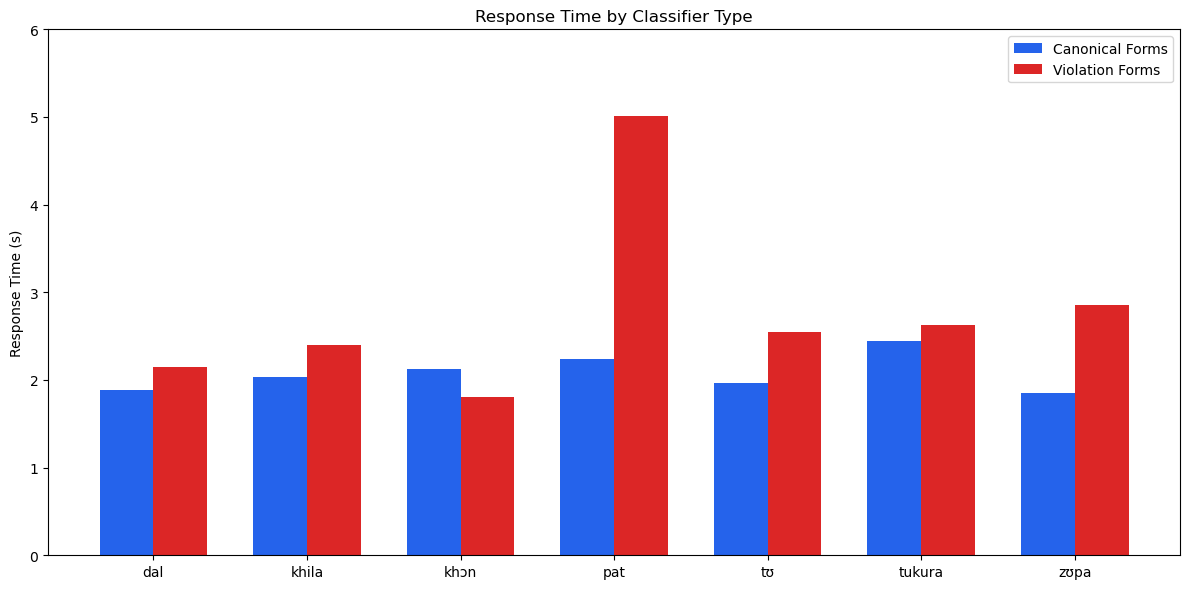

In [28]:
# Data for classifier accuracy
classifiers = [ 'dal', 'khila', 'khɔn', 'pat',  'tʊ', 'tukura','zʊpa']
canonical_rp = np.array([1.89, 2.03, 2.13, 2.24, 1.97, 2.45, 1.85])
violation_rp = np.array([2.15, 2.40, 1.807617, 5.01, 2.55, 2.63, 2.86])


# Create figure 1: Accuracy Comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(classifiers))

plt.bar(x - width/2, canonical_rp, width, label='Canonical Forms', color='#2563eb')
plt.bar(x + width/2, violation_rp, width, label='Violation Forms', color='#dc2626')

plt.ylabel('Response Time (s)')
plt.title('Response Time by Classifier Type')
plt.xticks(x, classifiers)
plt.legend()


plt.ylim(0, 6)
plt.tight_layout()

# Save the accuracy plot
plt.savefig('classifier_accuracy.png', dpi=300, bbox_inches='tight')



# Show both plots
plt.show()

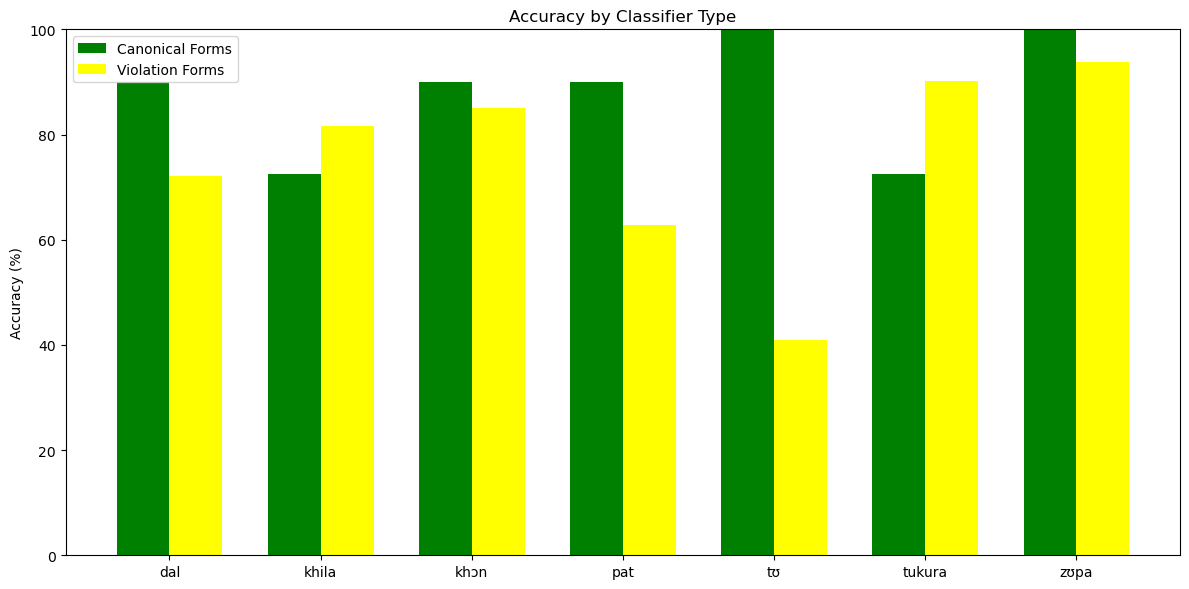

In [30]:


# Data for classifier accuracy
classifiers = [ 'dal', 'khila', 'khɔn', 'pat',  'tʊ', 'tukura','zʊpa']
canonical_acc = np.array([90, 72.5, 90, 90, 100, 72.5, 100])
violation_acc = np.array([72.13, 81.58, 85, 62.71, 40.87, 90.16, 93.75])


# Create figure 1: Accuracy Comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(classifiers))

plt.bar(x - width/2, canonical_acc, width, label='Canonical Forms', color='green')
plt.bar(x + width/2, violation_acc, width, label='Violation Forms', color='yellow')

plt.ylabel('Accuracy (%)')
plt.title('Accuracy by Classifier Type')
plt.xticks(x, classifiers)
plt.legend()


plt.ylim(0, 100)
plt.tight_layout()

# Save the accuracy plot
plt.savefig('classifier_accuracy.png', dpi=300, bbox_inches='tight')



# Show both plots
plt.show()

#### Distribution of response time and accuracy

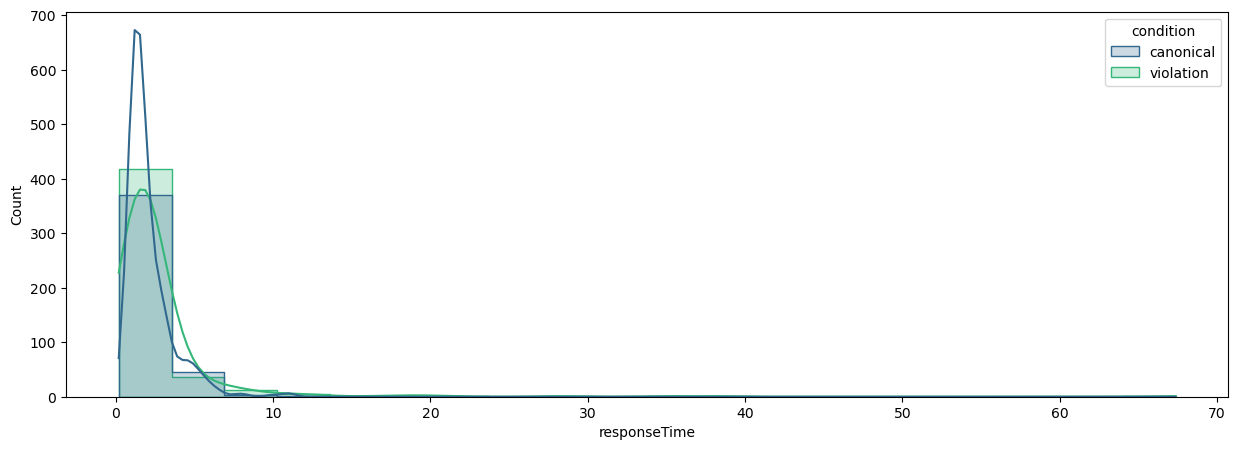

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data=data, x='responseTime', hue='condition', kde=True, bins=20, palette="viridis", element="step")
plt.show()

<Figure size 1500x500 with 0 Axes>

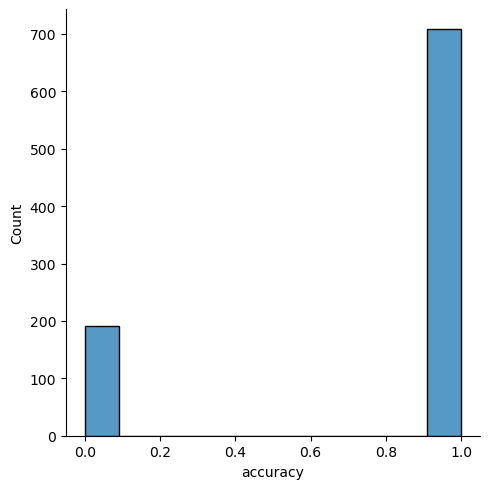

In [ ]:
plt.figure(figsize=(15, 5))
sns.displot(data=data, x='accuracy')
plt.show()

#### Since data is not normal, we will use Paired Wilcoxon Signed Rank Test to find if canonical response times and accuracies differ with violation response times and accuracies.

In [14]:
data_pivot = summary.pivot(index='Name', columns='condition', values=['AvgResponseTime','AvgAccuracy'] )
data_pivot

AvgResponseTime            AvgAccuracy          
condition                     canonical  violation   canonical violation
Name                                                                    
ATS                            1.144867   1.114450    0.666667  0.750000
Akib Tahjibur Rahman           1.609333   1.825708    1.000000  0.750000
Alex                           2.719410   2.000425    0.761905  0.166667
Aman Toppo                     1.842319   1.646217    0.809524  0.416667
Ankita Borah                   2.882133   3.712712    0.952381  0.916667
Antara                         3.019371  11.569312    0.904762  0.666667
Anubhav Kashyap                1.882905   1.960196    0.904762  0.666667
Ayanabh Kashyap                2.814862   2.562792    0.761905  0.875000
Bably                          2.657357   6.179629    0.952381  0.916667
Blizum                         1.274819   1.684692    1.000000  0.916667
Dev Darshan Mahanta            1.719295   1.412996    0.904762  0.625000
Devojani                       1.524186   1.538079    0.952381  0.958333
Dyuti Kakati                   1.738952   1.322458    0.904762  0.625000
Mridul Hasan Choudhury         1.540424   1.508887    0.857143  0.500000
Nayanku                        1.949790   1.691079    0.857143  0.750000
Nayeem                         1.796952   2.451083    0.904762  0.541667
Nisha                          3.402810   4.074242    0.809524  0.833333
Rikee                          2.112790   1.530967    0.857143  0.958333
Shatabdee Saikia               2.320838   3.004462    0.904762  0.791667
Tridip Kalita                  1.971767   1.733533    0.809524  0.583333

Checking normality of the four samples

In [15]:
print(pg.normality(data= data_pivot['AvgResponseTime']['canonical']))
print('\n', pg.normality(data= data_pivot['AvgResponseTime']['violation']))
print('\n', pg.normality(data= data_pivot['AvgAccuracy']['canonical']))
print('\n', pg.normality(data= data_pivot['AvgAccuracy']['violation']))

                  W      pval  normal
canonical  0.943332  0.276967    True

                   W      pval  normal
violation  0.604659  0.000003   False

                   W      pval  normal
canonical  0.943413  0.277934    True

                   W      pval  normal
violation  0.925481  0.126361    True


#### Paired Wilcoxon Signed rank test
We can see for response times p > 0.05. Hence, there's no statistical difference between canonical and violation forms in response times. However, p < 0.01 for accuracy, which shows high statistical significance between canonical accuracies and violation accuracies.
Moreover, the effect size r = 0.7, which shows there's a high degree of change between the two.

In [16]:
canonical_responsetime = data_pivot['AvgResponseTime']['canonical']
violation_responsetime = data_pivot['AvgResponseTime']['violation']

canonical_accuracy = data_pivot['AvgAccuracy']['canonical']
violation_accuracy = data_pivot['AvgAccuracy']['violation']

# Perform Wilcoxon signed-rank test
res_rt = wilcoxon(canonical_responsetime, violation_responsetime, method='approx')
res_ac = wilcoxon(canonical_accuracy, violation_accuracy, method= 'approx')

In [17]:
alpha = 0.05
print("Null Hypothesis : There's no significant difference between the results of the two conditions")

print("Wilcoxon signed-rank test results for response time:")
print("Statistic:", res_rt.statistic)
print("P-value:", res_rt.pvalue)

print("\nWilcoxon signed-rank test results for accuracy:")
print("Statistic:", res_ac.statistic)
print("P-value:", res_ac.pvalue)

Null Hypothesis : There's no significant difference between the results of the two conditions
Wilcoxon signed-rank test results for response time:
Statistic: 86.0
P-value: 0.47812547119613813

Wilcoxon signed-rank test results for accuracy:
Statistic: 25.0
P-value: 0.002808874668924646


In [18]:
# Now effect size, r 
r = abs(res_ac.zstatistic) / (18 ** 0.5)
r

0.7042583693635175

#### Checking if accuracy(binary) and response time(continuous) are correlated using Point Biserial

They are not correlated

In [19]:
corr, p = pointbiserialr(data['accuracy'], data['responseTime'])

print("Correlation:", corr)
print("p value:", p)

Correlation: -0.010868674066498656
p value: 0.7447143843586801


#### Now we use Welch Anova to check if there's diffrence among the classifiers. We use Welch ANOVA because the samples have different variances

For response time, p < 0.05 and η2(effect size) = 0.02, which means response times are statistically different among the classifiers, but only moderately as alpha is 0.05 and effect size is very tiny.

For accuracy, p < 0.01 and η2(effect size) = 0.06, which means accuracies are very highly statistically different among the classifiers, but the effect size is small.

In [20]:
pg.welch_anova(data=data, dv='responseTime', between='classifier')

,Source,ddof1,ddof2,F,p-unc,np2
0,classifier,6,367.107406,2.490698,0.022486,0.025074


In [21]:
pg.welch_anova(data=data, dv='accuracy', between='classifier')

,Source,ddof1,ddof2,F,p-unc,np2
0,classifier,6,382.337713,14.932137,2.322270e-15,0.065139


#### Two way ANOVA to see if classifier and condition both have significant effect

For response time, the mixed effect of classifier * condition is p < 0.05 and η2(effect size) = 0.02, which means response times are statistically different across the classifiers and conditions, but only moderately as alpha is 0.05 and effect size is very tiny.

For accuracy, p < 0.01 and η2(effect size) = 0.1, which means accuracies are very highly statistically different across the classifiers and conditions, but the effect size is small.

In [22]:
pg.anova(data=data, dv='responseTime', between=['classifier', 'condition'])

,Source,SS,DF,MS,F,p-unc,np2
0,classifier,252.945522,6.0,42.157587,3.646626,0.001394,0.024100
1,condition,72.507918,1.0,72.507918,6.271925,0.012445,0.007029
2,classifier * condition,156.758177,6.0,26.126363,2.259927,0.035920,0.015074
3,Residual,10242.790724,886.0,11.560712,NaN,NaN,NaN


In [23]:
pg.anova(data=data, dv='accuracy', between=['classifier', 'condition'])

,Source,SS,DF,MS,F,p-unc,np2
0,classifier,8.214455,6.0,1.369076,9.856301,1.532967e-10,0.062571
1,condition,4.356096,1.0,4.356096,31.360566,2.858943e-08,0.034186
2,classifier * condition,13.776769,6.0,2.296128,16.530370,4.011602e-18,0.100674
3,Residual,123.068598,886.0,0.138904,NaN,NaN,NaN
